In [14]:
# from analysis.moment_analysis import ModelsContainer
from sklearn.metrics import roc_auc_score
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
import os


from energyflow.archs.moment import EFN_moment, PFN_moment
from ModelsContainer import ModelsContainer

# plt.style.use('seaborn-white')



In [15]:
pfn_string = "EFN"
dataset = "qg"
run_name = "latent_relu"

num_models_to_train = 3 ##number of models to use to make error bars
order_list = [1,2, 3, 4] #
input_dim = 2
output_dim = 1
F_width = 25
Phi_width = 25


performance = {}
configs = {}
histories = {}


# Directory Handling
base_directory = f"/n/home01/rikab/MomentAnalysis/Data/{dataset}_{pfn_string}_{run_name}"
plot_directory = f"/n/home01/rikab/MomentAnalysis/Plots/{dataset}_{pfn_string}_{run_name}"
latent_directory = os.path.join(plot_directory, "latent_spaces")
os.makedirs(plot_directory, exist_ok = True)
os.makedirs(latent_directory, exist_ok = True)


for k in order_list:

    directory = os.path.join(base_directory, f"order_{k}")


    p = np.load(os.path.join(directory , "performance.npy"), allow_pickle=True)[()]
    h = np.load(os.path.join(directory ,"histories.npy"), allow_pickle=True)[()]
    c = np.load(os.path.join(directory , "configs.npy"), allow_pickle=True)[()]

    performance.update(p)
    configs.update(c)
    histories.update(h)


dataset_string = "Top/QCD" if dataset == "top" else "Quark/Gluon"




/tmp/ipykernel_691502/1591809295.py:68: RuntimeWarning: divide by zero encountered in log
  qg_sizes, qg_angles = np.log(qg_angles / R), np.log(qg_sizes / (np.pi * R**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


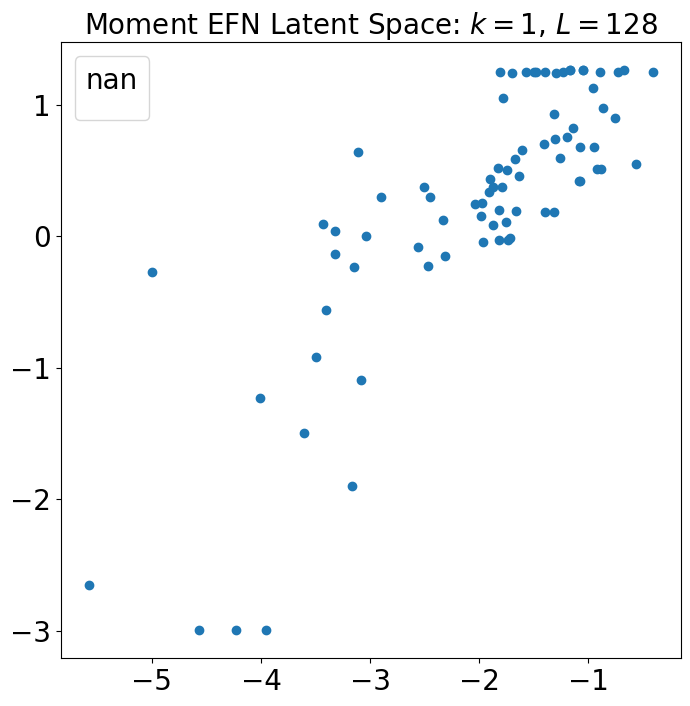

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


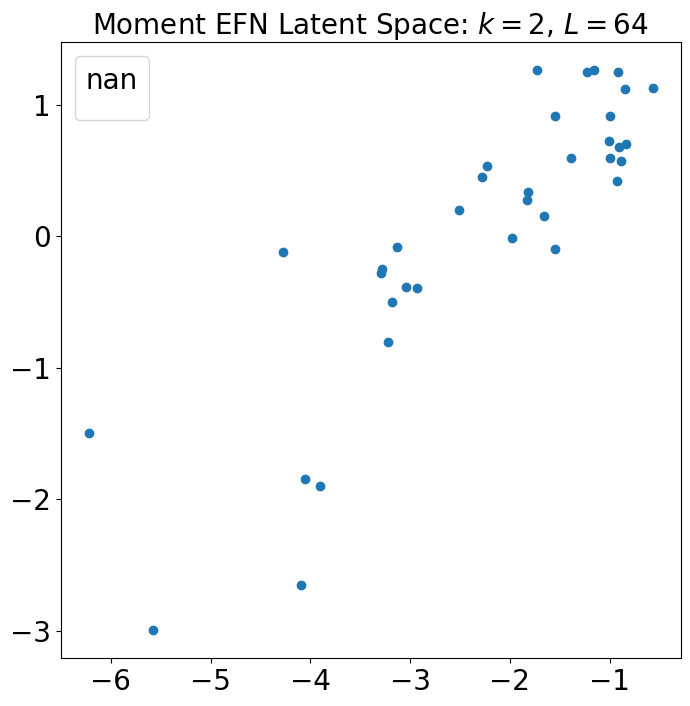

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


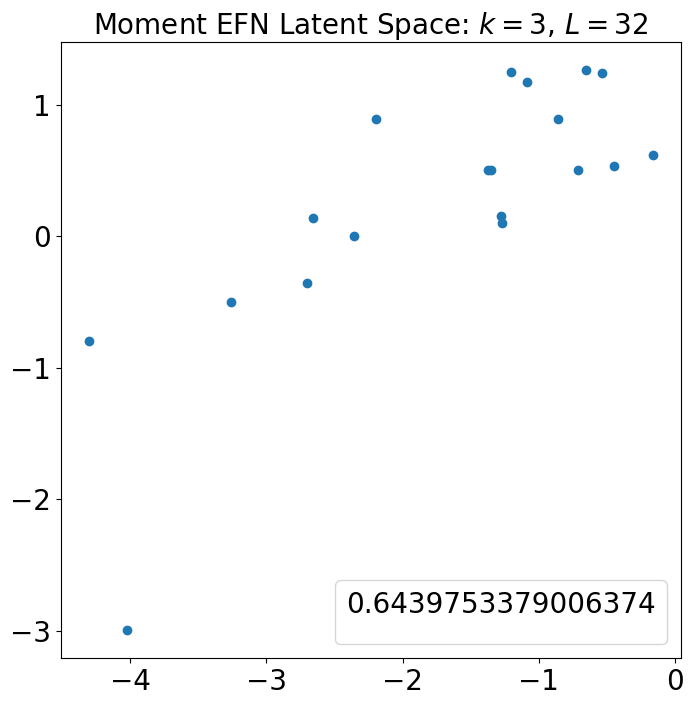

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


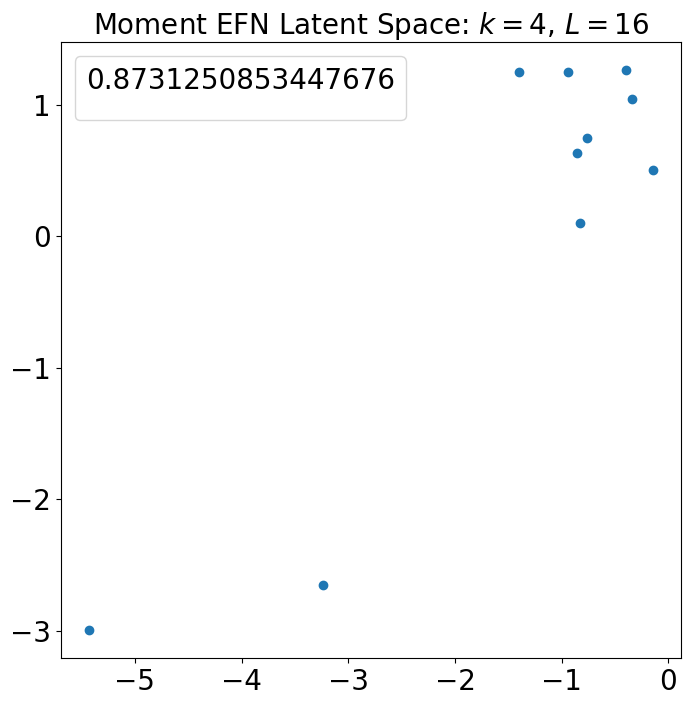

In [18]:

R, n = 0.4, 100



def plot_area(performance_dict):
    

    colors = ['Reds', 'Oranges', 'Greens', 'Blues', 'Purples', 'Greys']


    for p, order in enumerate(order_list):
        x = []
        y = []
        yerr= []

        for (config,info) in zip(configs['Order '+str(order)], performance_dict['Order '+str(order)]):
            
            L, F, Phi = config

            # Load model
            dictionary = {'Phi_mapping_dim' : [input_dim,L],
                                        'output_dim' : 2, 'output_act' : 'sigmoid',
                                        'Phi_sizes' : [Phi, Phi], 'Phi_acts' : 'ReLU', "Phi_l1_regs" :  1e-6,
                                        'F_sizes' : [F,F,F], 'F_acts': 'ReLU', "F_l1_regs" :  1e-6,
                                        'order' : order , 'architecture_type':'moment',
                                        'loss': 'binary_crossentropy','metrics': 'acc',}
            model = EFN_moment(**dictionary, summary=False)
            model_dir = os.path.join(base_directory, f"order_{order}", "Models")
            model_name = f"O{order}_L{L}_2Phi{Phi}_3F{F}"
            model.load_weights(os.path.join(model_dir , model_name + "_1.keras"), by_name = True,  skip_mismatch = True)

            X, Y, Z = model.eval_filters(R,n)
            subcolors = [colors[p]]


       

            grads = np.linspace(0.45, 0.55, 4)



            def format_filter(filt):

                size, angle = get_filter_size_and_position(filt)
                minus_size, minus_angle = get_filter_size_and_position(-1 * filt)

                if minus_angle < angle:
                    filt = -filt

                filt += np.min(filt)
                filt /= np.max(filt)

                return filt


            # for sorting filters according to position
            def get_filter_size_and_position(filt, zfrac=0.5):  
                
                # max_val = np.max(filt)
                # min_val = np.min(filt)

                # if np.abs(min_val) > np.abs(max_val):
                #     filt = -filt

                 
                filt /= np.max(filt)
                maxind = np.argmax(filt)
                j, k = maxind//n, maxind%n

                angle = np.sqrt((j-n/2)**2 + (k-n/2)**2)*2/n
                size = np.count_nonzero(filt > zfrac)/n**2

                return size, angle

        

            if L == 2**(8-order):

                sizes, angles = [], []
                for z in Z:
                    size, angle = get_filter_size_and_position(format_filter(z))
                    sizes.append(size)
                    angles.append(angle)
                qg_sizes, qg_angles = np.asarray(sizes), np.asarray(angles)
                qg_sizes, qg_angles = np.log(qg_angles / R), np.log(qg_sizes / (np.pi * R**2))


                qg_angles = qg_angles[qg_angles < 0]
                qg_sizes = qg_sizes[qg_angles < 0]
                a, b = np.polyfit(qg_angles, qg_sizes, 1)

                fig, axes = plt.subplots(figsize=(8,8))
                plt.rcParams['font.size'] = '20'
                plt.scatter(qg_angles, qg_sizes, )
                # plt.contourf(X, Y, z/np.max(z), grads, cmap=subcolors[i % len(subcolors)])

                plt.title(f'Moment EFN Latent Space: $k = {order}$, $L = {L}$', fontdict={'fontsize': 20})
                plt.legend(title = a)


                # plt.savefig(os.path.join(latent_directory, f"latent_space_O{p}_L{L}.pdf"))
                plt.show()
    # plt.show()


plot_area(performance)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

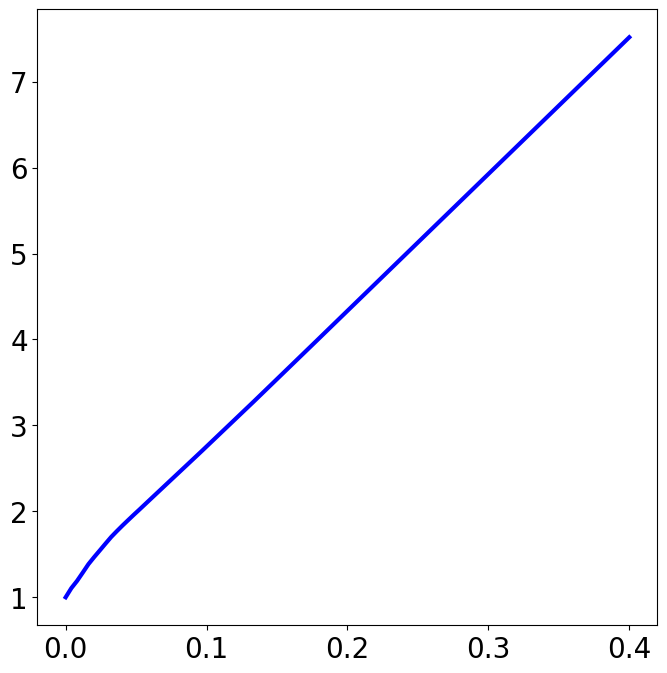

In [17]:
order = 4
L, F, Phi = 1, 100, 100

fig, axes = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = '20'


# Load model
dictionary = {'Phi_mapping_dim' : [input_dim,L],
                            'output_dim' : 1, 'output_act' : 'sigmoid',
                            'Phi_sizes' : [Phi, Phi], 'Phi_acts' : 'LeakyReLU', "Phi_l1_regs" :  1e-6,
                            'F_sizes' : [F,F,F], 'F_acts': 'LeakyReLU', "F_l1_regs" :  1e-6,
                            'order' : order , 'architecture_type':'moment',
                            'loss': 'binary_crossentropy','metrics': 'acc',}
model = EFN_moment(**dictionary, summary=False)
model_dir = os.path.join(base_directory, f"order_{order}", "Models")
model_name = f"O{order}_L{L}_2Phi{Phi}_3F{F}"
model.load_weights(os.path.join(model_dir , model_name + "_0.keras"), by_name = True,  skip_mismatch = True)

X, Y, Z = model.eval_filters([0, 0, R, 0.000],n)

# print[Z[0,:,0]]
# plot filters
for i,z in enumerate(Z):

    x = X[:,0]
    y = z[:,0] / np.max(z[:,0])
    plt.plot(X[:,0], z[:,0] / np.max(z[:,0]), color = "blue", lw = 3, label = "Latent Space")

    a, b, c = scipy.optimize.curve_fit(lambda t,a,b,c: a+b*np.log(c + t),  x[0:],  y[0:])[0]
    y_log = a + b*np.log(x + c)
    print(a, b, c)
    # b, a = np.polyfit(np.log(x[25:]), y[15:], 1)
    plt.plot(x[0:], y_log[0:], color = "darkblue", alpha = 0.25, lw = 3, ls = "--", label = "Fit: $c_1 + c_2$log$(c_3 + y)$")

    plt.text(0.15, 0.775-0.075*0, "$c_1 = %.3f$" % a, horizontalalignment='center', verticalalignment='center', transform=axes.transAxes)
    plt.text(0.15, 0.775-0.075*1, "$c_2 = %.3f$" % b, horizontalalignment='center', verticalalignment='center', transform=axes.transAxes)
    plt.text(0.15, 0.775-0.075*2, "$c_3 = %.3f$" % c, horizontalalignment='center', verticalalignment='center', transform=axes.transAxes)

# plt.xticks(np.linspace(0, R, 5), ['0', 'R/4' 'R/2', '3R/4', 'R'])
# plt.yticks(np.linspace(-R, R, 5), ['-R', '-R/2', '0', 'R/2', 'R'])
plt.xlabel('Rapidity $y$')
plt.ylabel('Latent Embdedding $\phi(y, 0)$')
# plt.ylim(0.1, 1.1)
plt.title(f'Moment EFN Latent Space: $k = {order}$, $L = {L}$', fontdict={'fontsize': 20})
plt.legend(frameon = False, loc = "upper left")

plt.savefig(os.path.join(plot_directory, "latent_fit.pdf"))


In [ ]:

## training
epochs = 50
batch_size=500
callbacks =None
verbose = 2
###########

order_performance = dict()
for order in order_list:
    order_performance['Order '+str(order)] = []
    


for order in order_list:
    for i in range(num_samples):
        info = configs['Order '+str(order)][i]
        L, F, Phi = info

        container = ModelsContainer(**{'Phi_mapping_dim' : [input_dim,L],
                                      'output_dim' : 1, 'output_act' : 'sigmoid',
                                      'Phi_sizes' : [Phi, Phi], 'Phi_acts' : 'LeakyReLU',
                                      'F_sizes' : [F,F,F], 'F_acts': 'LeakyReLU',
                                      'order' : order , 'architecture_type':'moment',
                                      'loss': 'binary_crossentropy','metrics': 'acc'})
        print(i, order, info, container.num_params)
        num_params = container.num_params
        
        order_performance['Order '+str(order)].append([num_params,mean,std])

        # Just for fun, update the plot
        plot(order_performance)
   
    order_performance['Order '+str(order)] = np.array(order_performance['Order '+str(order)])